# Stock Portfolio Optimization Tool Using AI

# Data exploration

In [3]:
#loads required packages
%load_ext watermark

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import zipline
import warnings
import pyfolio as pf
import empyrical as ep
from yahoofinancials import YahooFinancials
from datetime import datetime
from dateutil.relativedelta import relativedelta

C:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
C:\Anaconda\lib\site-packages\pyfolio\pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [4]:


#dataFileName = input("Please enter the name of the data file.")
#print(dataFileName)

#stock_data = pd.read_csv("Stocks/"+dataFileName+".csv")
stock_data = pd.read_csv("Stocks/prices.csv")
stock_data['date'] = pd.to_datetime(stock_data['date'])
stock_data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
stock_data.dropna()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [6]:
stock_data.isnull()

,date,symbol,open,close,low,high,volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
851259,False,False,False,False,False,False,False
851260,False,False,False,False,False,False,False
851261,False,False,False,False,False,False,False
851262,False,False,False,False,False,False,False


In [7]:
stock_data.dtypes

date      datetime64[ns]
symbol            object
open             float64
close            float64
low              float64
high             float64
volume           float64
dtype: object

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [9]:
stock_data.tail(n=2)

,date,symbol,open,close,low,high,volume
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.59,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.48,705100.0


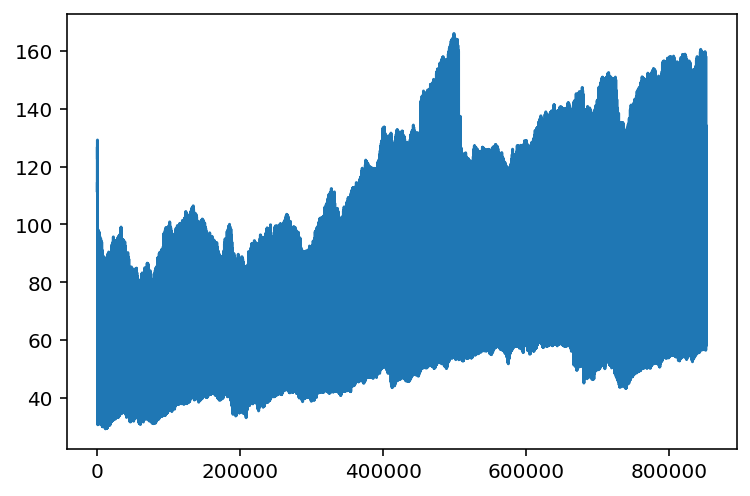

In [10]:
stock_data['open'].rolling(25).mean().plot()

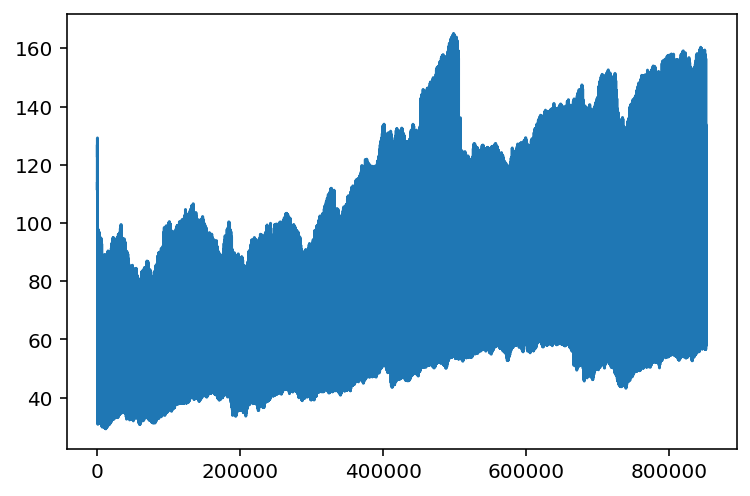

In [11]:
stock_data['close'].rolling(25).mean().plot()

In [12]:
stock_data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

# Markowitz

In [13]:
# https://towardsdatascience.com/algorithmic-trading-based-on-mean-variance-optimization-in-python-62bdf844ac5b

#selects the assets that are to be used in the portfolio
tickers = ['FB','AAPL','TSLA','BP']

yahoo_financials = YahooFinancials(tickers)
data = yahoo_financials.get_historical_price_data('2019-01-01','2020-01-01','daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in tickers
})



prices_df.index.name="formatted_date"
prices_df.index = pd.to_datetime(prices_df.index)
prices_df.head()



,FB,AAPL,TSLA,BP
formatted_date,,,,
2019-01-02,135.679993,155.214005,310.119995,35.675777
2019-01-03,131.740005,139.753540,300.359985,35.879162
2019-01-04,137.949997,145.719513,317.690002,37.007030
2019-01-07,138.050003,145.395203,334.959991,37.127216
2019-01-08,142.529999,148.166870,335.350006,37.007030


In [14]:
prices_df.columns

Index(['FB', 'AAPL', 'TSLA', 'BP'], dtype='object')

Text(0.5, 0, 'Date')

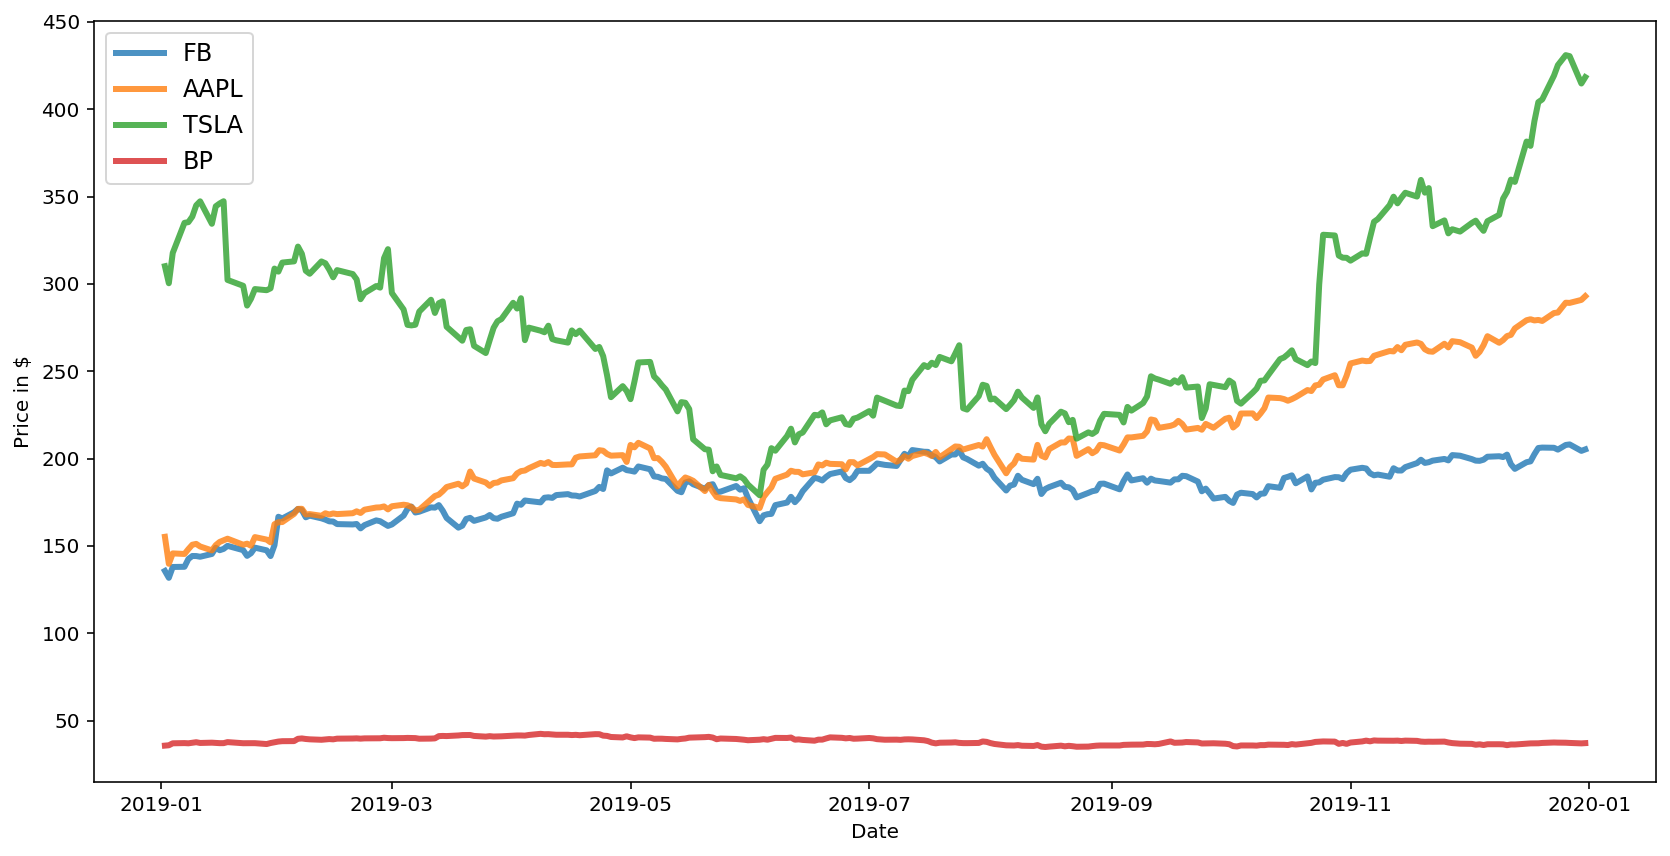

In [15]:

plt.figure(figsize=(14,7))
for c in prices_df.columns.values:
    plt.plot(prices_df.index,prices_df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.xlabel('Date')


Text(0, 0.5, 'Daily Returns')

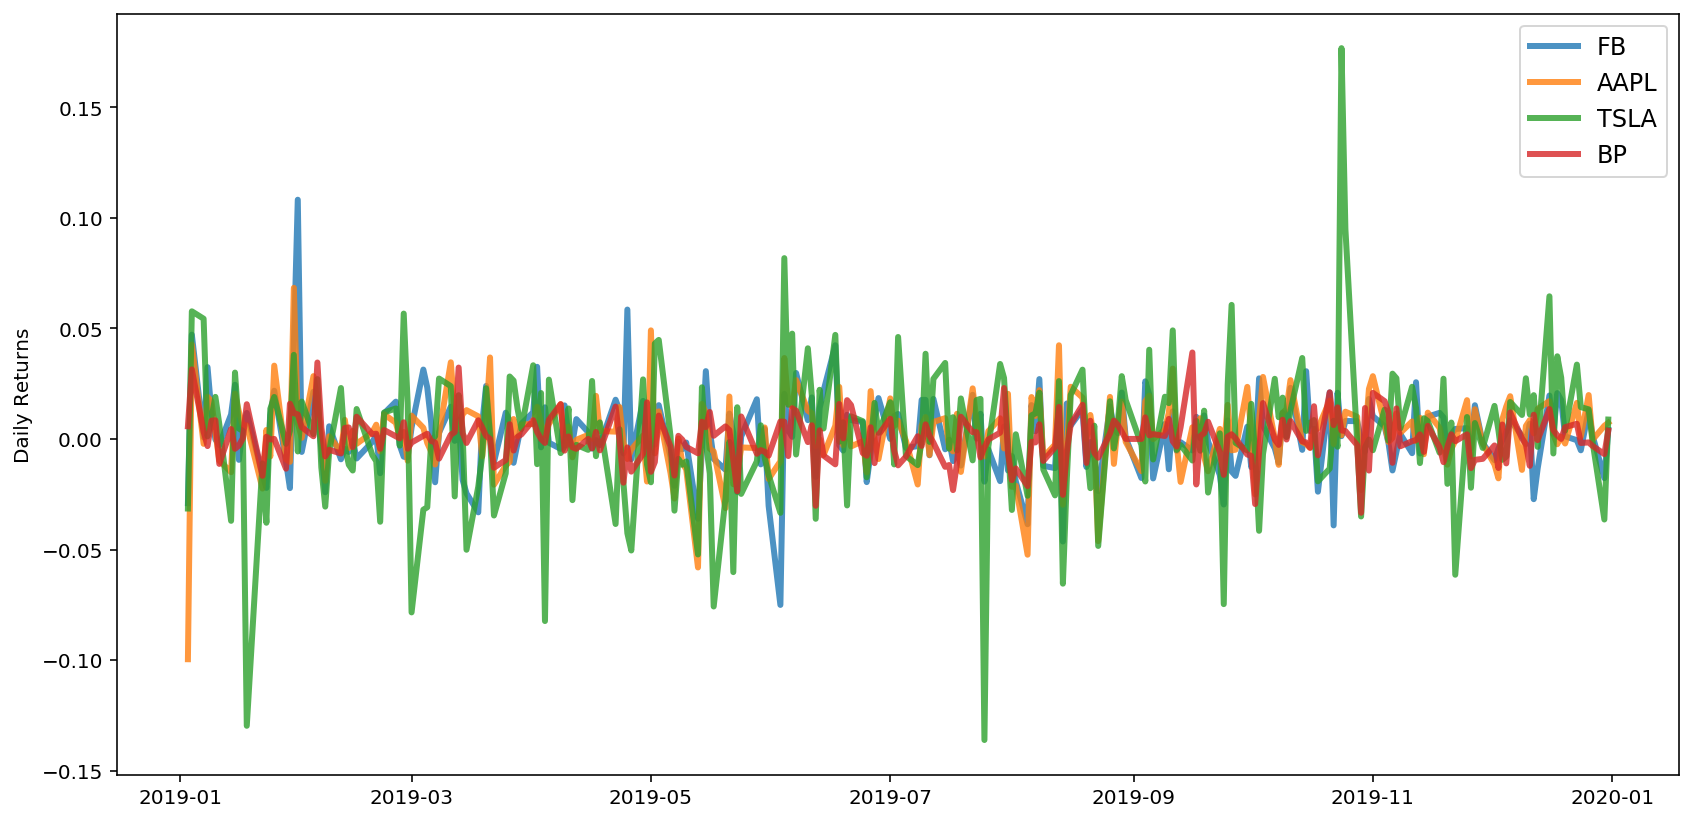

In [16]:
returns = prices_df.pct_change()

plt.figure(figsize=(14,7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right',fontsize=12)
plt.ylabel('Daily Returns')

In [17]:
# https://towardsdatascience.com/efficient-frontier-portfolio-optimisation-in-python-e7844051e7f

In [18]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [45]:
returns = prices_df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

                  FB      AAPL      TSLA        BP
2017-01-03       NaN       NaN       NaN       NaN
2017-01-04  0.013100  0.000432 -0.000512 -0.001312
2017-01-05  0.011144  0.000604  0.054342  0.002365
2017-01-06  0.017836  0.007419  0.002252  0.000524
2017-01-09  0.021243  0.010019  0.008990 -0.015199
...              ...       ...       ...       ...
2019-12-24 -0.001935  0.014829  0.015979  0.006895
2019-12-26 -0.003539  0.000457  0.022827  0.002370
2019-12-27  0.015080  0.022119  0.016569  0.004729
2019-12-30 -0.003882 -0.005702 -0.014276 -0.011506
2019-12-31 -0.018570  0.001624 -0.055482 -0.010053

[754 rows x 4 columns]


In [20]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=prices_df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]

    max_sharpe_allocation.allocation
    max_sharpe_allocation = max_sharpe_allocation.T
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=prices_df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print (prices_df)

    
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
    

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.62
Annualised Volatility: 0.24


               FB   AAPL  TSLA    BP
allocation  20.98  76.27   2.6  0.16
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.18
Annualised Volatility: 0.15


               FB  AAPL  TSLA    BP
allocation  14.76  9.56  1.18  74.5
                        FB        AAPL        TSLA         BP
formatted_date                                               
2019-01-02      135.679993  155.214005  310.119995  35.675777
2019-01-03      131.740005  139.753540  300.359985  35.879162
2019-01-04      137.949997  145.719513  317.690002  37.007030
2019-01-07      138.050003  145.395203  334.959991  37.127216
2019-01-08      142.529999  148.166870  335.350006  37.007030
...                    ...         ...         ...        ...
2019

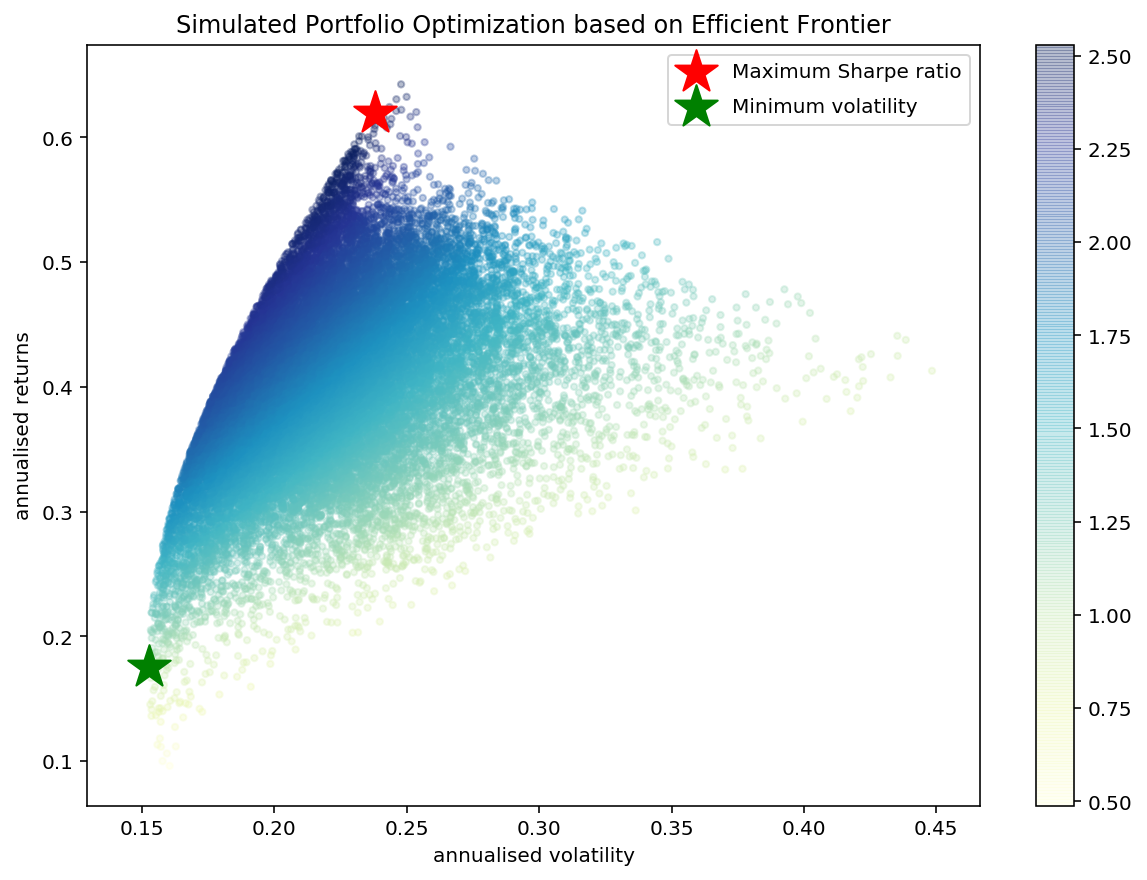

In [21]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

NameError: name 'true' is not defined

In [54]:
prices_df.columns

Index(['FB', 'AAPL', 'TSLA', 'BP'], dtype='object')

In [70]:
totalToInvest = 10000
cash = totalToInvest

print (prices_df.pct_change())

for i in prices_df.pct_change():
    cash=cash+(prices_df.pct_change()*cash)
    print (cash)

                  FB      AAPL      TSLA        BP
2017-01-03       NaN       NaN       NaN       NaN
2017-01-04  0.013100  0.000432 -0.000512 -0.001312
2017-01-05  0.011144  0.000604  0.054342  0.002365
2017-01-06  0.017836  0.007419  0.002252  0.000524
2017-01-09  0.021243  0.010019  0.008990 -0.015199
...              ...       ...       ...       ...
2019-12-24 -0.001935  0.014829  0.015979  0.006895
2019-12-26 -0.003539  0.000457  0.022827  0.002370
2019-12-27  0.015080  0.022119  0.016569  0.004729
2019-12-30 -0.003882 -0.005702 -0.014276 -0.011506
2019-12-31 -0.018570  0.001624 -0.055482 -0.010053

[754 rows x 4 columns]
                      FB          AAPL          TSLA            BP
2017-01-03           NaN           NaN           NaN           NaN
2017-01-04  10131.000973  10004.317394   9994.880359   9986.876840
2017-01-05  10111.441729  10006.042270  10543.422499  10023.653129
2017-01-06  10178.361327  10074.189150  10022.524270  10005.243959
2017-01-09  10212.431776  101

NameError: name 'weights' is not defined

# Algorithm 

In [23]:
# https://www.tensorflow.org/tensorboard/get_started
# https://www.tensorflow.org/tutorials/load_data/pandas_dataframe

In [24]:
%load_ext tensorboard

In [25]:
import tensorflow as tf
import datetime
from yahoofinancials import YahooFinancials as yf
import pandas as pd

In [26]:
risky_assets = ['FB','AAPL','TSLA','BP']

yahoo_financials = YahooFinancials(risky_assets)
data = yahoo_financials.get_historical_price_data('2019-01-01','2019-09-30','daily')

prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['adjclose'] for x in data[asset]['prices']} for asset in risky_assets
})



prices_df.index.name="formatted_date"
prices_df.index = pd.to_datetime(prices_df.index)

In [27]:
stocks = prices_df.copy()

stocks.dtypes

FB      float64
AAPL    float64
TSLA    float64
BP      float64
dtype: object

In [28]:
stocks.head

<bound method NDFrame.head of                         FB        AAPL        TSLA         BP
formatted_date                                               
2019-01-02      135.679993  155.214005  310.119995  35.675777
2019-01-03      131.740005  139.753540  300.359985  35.879162
2019-01-04      137.949997  145.719513  317.690002  37.007030
2019-01-07      138.050003  145.395203  334.959991  37.127216
2019-01-08      142.529999  148.166870  335.350006  37.007030
...                    ...         ...         ...        ...
2019-09-23      186.820007  217.548996  241.229996  37.508293
2019-09-24      181.279999  216.514557  223.210007  36.898640
2019-09-25      182.800003  219.846634  228.699997  36.937344
2019-09-26      180.110001  218.712738  242.559998  37.014763
2019-09-27      177.100006  217.648483  242.130005  37.024441

[187 rows x 4 columns]>

In [29]:
from pandas_datareader import data as pdr

In [30]:
tickers = ['FB','AAPL','TSLA','BP']

start_date = '2017-01-01'
end_date = '2020-01-01'
yahoo_finacials = yf(tickers)
data = yahoo_finacials.get_historical_price_data(start_date, end_date, "daily")


keys = ['formatted_date','open','adjclose','high']
prices_df = pd.DataFrame({
    asset: {x['formatted_date']: x['open'] for x in data[asset]['prices']} for asset in tickers
})

In [31]:
prices_df

,FB,AAPL,TSLA,BP
2017-01-03,116.029999,115.800003,214.860001,38.099998
2017-01-04,117.550003,115.849998,214.750000,38.049999
2017-01-05,118.860001,115.919998,226.419998,38.139999
2017-01-06,120.980003,116.779999,226.929993,38.160000
2017-01-09,123.550003,117.949997,228.970001,37.580002
...,...,...,...,...
2019-12-24,206.300003,284.690002,418.359985,37.970001
2019-12-26,205.570007,284.820007,427.910004,38.060001
2019-12-27,208.669998,291.119995,435.000000,38.240002
2019-12-30,207.860001,289.459991,428.790009,37.799999


In [32]:
print(data)

{'FB': {'eventsData': {}, 'firstTradeDate': {'formatted_date': '2012-05-18', 'date': 1337328000}, 'currency': 'USD', 'instrumentType': 'EQUITY', 'timeZone': {'gmtOffset': -18000}, 'prices': [{'date': 1483453800, 'high': 117.83999633789062, 'low': 115.51000213623047, 'open': 116.02999877929688, 'close': 116.86000061035156, 'volume': 20663900, 'adjclose': 116.86000061035156, 'formatted_date': '2017-01-03'}, {'date': 1483540200, 'high': 119.66000366210938, 'low': 117.29000091552734, 'open': 117.55000305175781, 'close': 118.69000244140625, 'volume': 19630900, 'adjclose': 118.69000244140625, 'formatted_date': '2017-01-04'}, {'date': 1483626600, 'high': 120.94999694824219, 'low': 118.31999969482422, 'open': 118.86000061035156, 'close': 120.66999816894531, 'volume': 19492200, 'adjclose': 120.66999816894531, 'formatted_date': '2017-01-05'}, {'date': 1483713000, 'high': 123.87999725341797, 'low': 120.02999877929688, 'open': 120.9800033569336, 'close': 123.41000366210938, 'volume': 28545300, 'ad

In [33]:
from pandas import json_normalize
df = pd.DataFrame.from_dict(json_normalize(data),orient='columns').T


In [34]:
df

,0
FB.firstTradeDate.formatted_date,2012-05-18
FB.firstTradeDate.date,1337328000
FB.currency,USD
FB.instrumentType,EQUITY
FB.timeZone.gmtOffset,-18000
...,...
BP.firstTradeDate.date,221130000
BP.currency,USD
BP.instrumentType,EQUITY
BP.timeZone.gmtOffset,-18000


In [35]:
ticker = input("Please enter a ticker here. I.e. BP.")
start_date = '2017-01-01'
end_date = '2020-01-01'

yahoo_finacials = yf(ticker)
data = yahoo_finacials.get_historical_price_data(start_date, end_date, "daily")

data

Please enter a ticker here. I.e. BP.BP


{'BP': {'eventsData': {'dividends': {'2017-08-09': {'amount': 0.6,
     'date': 1502285400,
     'formatted_date': '2017-08-09'},
    '2018-08-09': {'amount': 0.615,
     'date': 1533821400,
     'formatted_date': '2018-08-09'},
    '2019-08-08': {'amount': 0.615,
     'date': 1565271000,
     'formatted_date': '2019-08-08'},
    '2017-05-10': {'amount': 0.6,
     'date': 1494423000,
     'formatted_date': '2017-05-10'},
    '2017-02-15': {'amount': 0.595,
     'date': 1487169000,
     'formatted_date': '2017-02-15'},
    '2017-11-09': {'amount': 0.6,
     'date': 1510237800,
     'formatted_date': '2017-11-09'},
    '2018-05-10': {'amount': 0.6,
     'date': 1525959000,
     'formatted_date': '2018-05-10'},
    '2018-11-08': {'amount': 0.615,
     'date': 1541687400,
     'formatted_date': '2018-11-08'},
    '2019-05-09': {'amount': 0.615,
     'date': 1557408600,
     'formatted_date': '2019-05-09'},
    '2019-11-07': {'amount': 0.615,
     'date': 1573137000,
     'formatted_date': 

In [42]:
userInput_df = pdr.get_data_yahoo(ticker,
                          start_date,
                          end_date
                          )
userInput_df.head()
userInput_df=userInput_df.Close
userInput_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,38.119999,37.790001,38.099998,38.000000,8779200.0,31.103085
2017-01-04,38.340000,37.939999,38.049999,38.290001,6883300.0,31.340450
2017-01-05,38.680000,38.139999,38.139999,38.570000,6505700.0,31.569630
2017-01-06,38.189999,37.849998,38.160000,37.910000,5800900.0,31.029415
2017-01-09,37.650002,37.310001,37.580002,37.310001,5533600.0,30.538322


In [37]:
#https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/

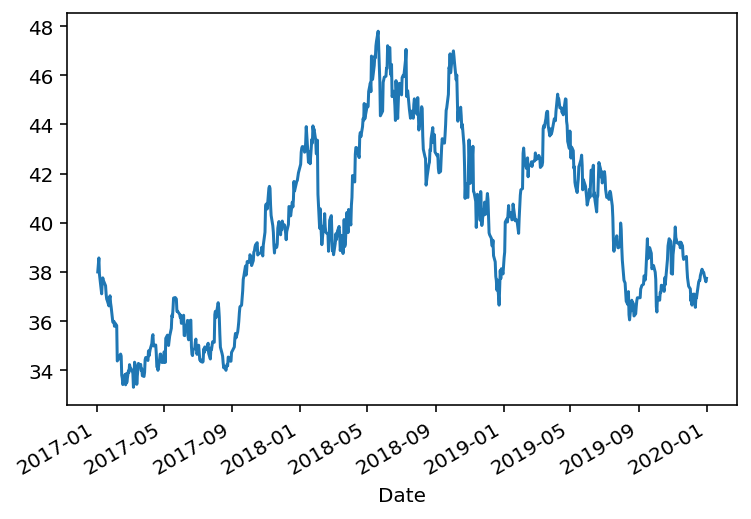

In [38]:
userInput_df.plot()

In [39]:
X = userInput_df.values
train_size = int(len(X)*0.66)
train, test = X[1:train_size], X[train_size:]

RMSE: 0.427


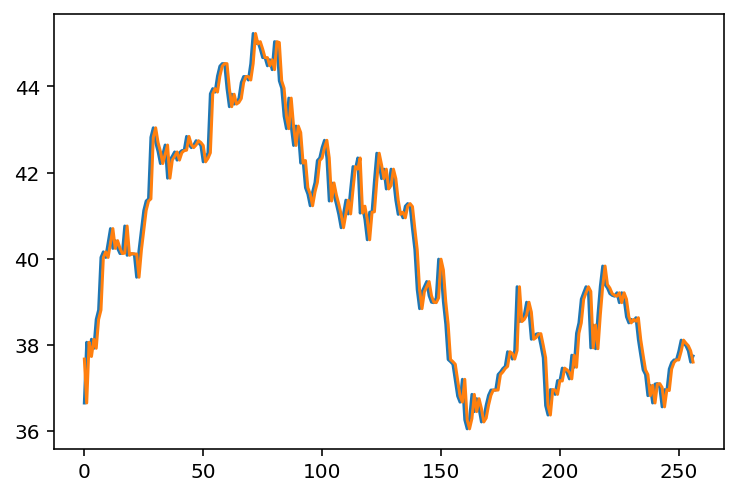

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    predictions.append(history[-1])
    history.append(test[i])
rmse = sqrt(mean_squared_error(test,predictions))
print('RMSE: %.3f' % rmse)
plt.plot(test)
plt.plot(predictions)
plt.show()

#this graph I believe is predicting the volume of trades over time
#I am not sure what the orange line is as of yet